In [1]:
from collections import Counter

In [3]:
import string

In [28]:
text = "Try not to become a man of success, but rather try to become a man of value."

In [29]:
def get_words(text):
    text = text.lower()
    for symbol in string.punctuation:
        text = text.replace(symbol, '')
    return text.split(' ')    

In [30]:
print(get_words(text))

['try', 'not', 'to', 'become', 'a', 'man', 'of', 'success', 'but', 'rather', 'try', 'to', 'become', 'a', 'man', 'of', 'value']


In [31]:
def count_words(text):
    return Counter(get_words(text))

In [32]:
print(count_words(text))

Counter({'to': 2, 'become': 2, 'a': 2, 'try': 2, 'of': 2, 'man': 2, 'not': 1, 'rather': 1, 'success': 1, 'but': 1, 'value': 1})


In [16]:
# ----------------------------------

In [17]:
text2 = 'This comprehension check is to check for comprehension.'

In [18]:
len(count_words(get_words(text2)))

6

In [19]:
print(count_words(get_words(text2)))

Counter({'check': 2, 'comprehension': 2, 'this': 1, 'for': 1, 'to': 1, 'is': 1})


In [20]:
# ----------------------------------

In [21]:
def read_book(filename):
    with open(filename, encoding='utf8') as f:
        return f.read().replace('\n', '')

In [38]:
filename_eng = './Books/English/shakespeare/Romeo and Juliet.txt'
filename_ger = './Books/German/shakespeare/Romeo und Julia.txt'

In [39]:
def word_stats(filename):
    text = read_book(filename)
    word_counts = count_words(text)
    return (len(word_counts), sum(word_counts.values()))

In [40]:
print(word_stats(filename_eng))
print(word_stats(filename_ger))

(4475, 40776)
(7241, 20311)


In [41]:
# ----------------------------------

In [42]:
import os

In [65]:
def get_word_stats():
    stats = []
    for language in os.listdir('./Books'):
        if language != '.DS_Store':
            for author in os.listdir('./Books' + '/' + language):
                if author != '.DS_Store':
                    for book in os.listdir('./Books' + '/' + language + '/' + author):
                        stats.append(word_stats('./Books' + '/' + language + '/' + author + '/' + book))
    return stats    

In [66]:
stats = get_word_stats()

In [67]:
print(stats[:10])

[(4345, 16103), (6776, 28551), (4780, 16874), (5898, 26590), (4888, 48315), (4475, 40776), (4978, 20949), (18440, 73801), (10398, 40827), (12704, 46306)]


In [63]:
# ----------------------------------

In [68]:
import pandas as pd

In [73]:
def get_word_stats2():
    statsDF = pd.DataFrame(columns=('language', 'author', 'title', 'unique', 'total'))
    title_num = 1
    for language in os.listdir('./Books'):
        if language != '.DS_Store':
            for author in os.listdir('./Books' + '/' + language):
                if author != '.DS_Store':
                    for title in os.listdir('./Books' + '/' + language + '/' + author):
                        stats = word_stats('./Books' + '/' + language + '/' + author + '/' + title)
                        statsDF.loc[title_num] = (language, author.capitalize(), title.replace('txt','') , stats[0], stats[1])
                        title_num += 1
    return statsDF 

In [74]:
statsDF = get_word_stats2()

In [78]:
statsDF.head()

,language,author,title,unique,total
1,English,Shakespeare,A Midsummer Night's Dream.,4345.0,16103.0
2,English,Shakespeare,Hamlet.,6776.0,28551.0
3,English,Shakespeare,Macbeth.,4780.0,16874.0
4,English,Shakespeare,Othello.,5898.0,26590.0
5,English,Shakespeare,Richard III.,4888.0,48315.0


In [79]:
# ----------------------------------

In [80]:
stats = statsDF

In [83]:
stats.unique.head()

1    4345.0
2    6776.0
3    4780.0
4    5898.0
5    4888.0
Name: unique, dtype: float64

In [84]:
stats.total.head()

1    16103.0
2    28551.0
3    16874.0
4    26590.0
5    48315.0
Name: total, dtype: float64

In [85]:
import matplotlib.pyplot as plt

In [87]:
%matplotlib inline

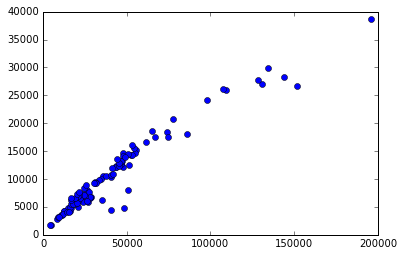

In [89]:
plt.plot(stats.total, stats.unique, 'bo')

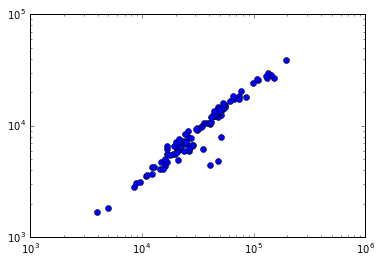

In [90]:
plt.loglog(stats.total, stats.unique, 'bo')

In [92]:
stats[stats.language == 'English']

,language,author,title,unique,total
1,English,Shakespeare,A Midsummer Night's Dream.,4345.0,16103.0
2,English,Shakespeare,Hamlet.,6776.0,28551.0
3,English,Shakespeare,Macbeth.,4780.0,16874.0
4,English,Shakespeare,Othello.,5898.0,26590.0
5,English,Shakespeare,Richard III.,4888.0,48315.0
6,English,Shakespeare,Romeo and Juliet.,4475.0,40776.0
7,English,Shakespeare,The Merchant of Venice.,4978.0,20949.0


In [98]:
subsetE = stats[stats.language == 'English']
subsetF = stats[stats.language == 'French']
subsetG = stats[stats.language == 'German']
subsetP = stats[stats.language == 'Portuguese']

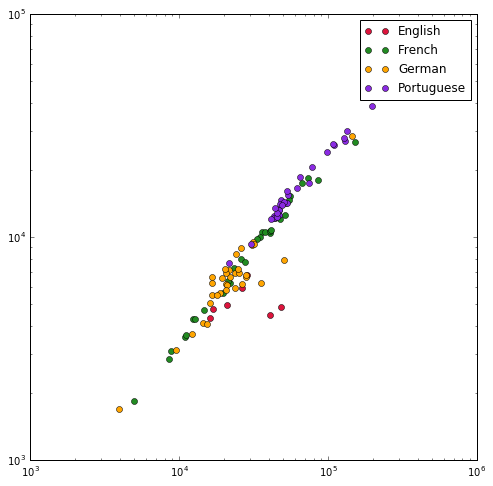

In [103]:
plt.figure(figsize = (8, 8))
plt.loglog(subsetE.total, subsetE.unique, 'o', label = 'English', color = 'crimson')
plt.loglog(subsetF.total, subsetF.unique, 'o', label = 'French', color = 'forestgreen')
plt.loglog(subsetG.total, subsetG.unique, 'o', label = 'German', color = 'orange')
plt.loglog(subsetP.total, subsetP.unique, 'o', label = 'Portuguese', color = 'blueviolet')
plt.legend()

In [106]:
stats.total.head()

1    16103.0
2    28551.0
3    16874.0
4    26590.0
5    48315.0
Name: total, dtype: float64

In [111]:
stats['total'].head()

1    16103.0
2    28551.0
3    16874.0
4    26590.0
5    48315.0
Name: total, dtype: float64